In [45]:
import pandas as pd
import category_encoders as ce
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
filename = "claims_data.csv"

In [47]:
df = pd.read_csv(filename, header=0)

In [4]:
df.head(20)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [6]:
# UNIVARIATE PLOTTING OF LOSS CATEGORY

<Axes: xlabel='loss', ylabel='Count'>

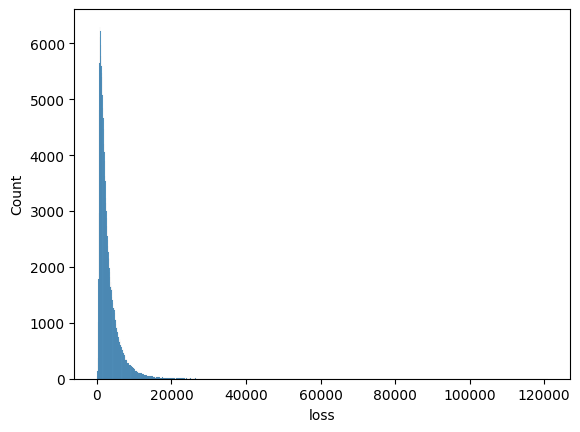

In [7]:
sns.histplot(data=df, x="loss")

In [8]:
df.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [9]:
# NO MISSING VALUES!

In [10]:
df.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [11]:
df.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [12]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [13]:
# Why do some categories have more than 2 possible values? What do the values stand for?

In [14]:
df[to_encode].nunique()

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64

In [15]:
top_10 = list(df['cat112'].value_counts().head(60).index)

top_10

['E',
 'AH',
 'AS',
 'J',
 'AF',
 'AN',
 'N',
 'U',
 'AV',
 'AK',
 'K',
 'AI',
 'S',
 'AP',
 'G',
 'F',
 'AW',
 'A',
 'AR',
 'C',
 'O',
 'D',
 'AD',
 'AY',
 'Y',
 'AG',
 'AT',
 'AA',
 'AM',
 'AL',
 'R',
 'AX',
 'I',
 'X',
 'AE',
 'Q',
 'V',
 'H',
 'AO',
 'T',
 'L',
 'W',
 'AC',
 'M',
 'AU',
 'B',
 'P',
 'AB',
 'BA',
 'AJ',
 'AQ']

In [21]:
categorical_columns = df.select_dtypes(include = ['object']).columns

catlist = categorical_columns.tolist()

#encoded_columns = pd.DataFrame()

for col in catlist:
    m_estimate_encoder = ce.MEstimateEncoder(cols=[col], m=5)
    df[col] = m_estimate_encoder.fit_transform(df[col], df['loss'])
    #encoded_columns = pd.concat([encoded_columns, encoded_col], axis=1)

#df = df.drop(columns = categorical_columns)

#df = pd.concat([df, encoded_columns], axis=1)

#df= df_encoded.astype(float)

df.head(20)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,3408.078419,3800.057434,2902.223547,3488.354592,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,3408.078419,3800.057434,2902.223547,2826.835029,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,3408.078419,3800.057434,2902.223547,2826.835029,3463.976775,3259.907946,2908.947835,2975.560301,3827.569429,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1915.318476,3800.057434,2902.223547,3488.354592,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,3408.078419,3800.057434,2902.223547,3488.354592,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,3408.078419,3800.057434,2902.223547,2826.835029,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,3408.078419,2454.167166,2902.223547,2826.835029,3463.976775,3259.907946,2908.947835,2975.560301,2512.032345,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,3408.078419,3800.057434,2902.223547,3488.354592,2814.657333,3259.907946,2908.947835,2975.560301,3827.569429,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,3408.078419,3800.057434,5365.512568,3488.354592,3463.976775,3259.907946,2908.947835,2975.560301,3827.569429,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,3408.078419,3800.057434,2902.223547,2826.835029,3463.976775,2519.731150,2908.947835,2975.560301,3827.569429,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [10]:
top_10 = list(df['cat112'].value_counts().head(60).index)

top_10


[3208.3752740598875,
 3476.4887378474764,
 3409.8779698103626,
 2832.8601330146266,
 3426.6158314764057,
 3111.3939186731213,
 3043.5809350234513,
 2594.8842074426925,
 2381.311463228336,
 2637.109041513646,
 3277.033962471694,
 2379.012328234823,
 3119.0660623938065,
 2302.829178134419,
 3249.8959780738573,
 2949.554359045133,
 2856.3516598185233,
 2803.8196640845817,
 2785.3912398431853,
 3249.903575786185,
 2728.5320833767596,
 2859.0727626838484,
 3291.3359950705403,
 2788.348110238442,
 2837.771016540081,
 2964.038546727807,
 3056.9099831075564,
 2788.0881127033304,
 2677.82482419434,
 3185.2353113906165,
 2919.536009244991,
 2943.187208923401,
 2473.651797278677,
 2817.8997294928495,
 2431.9903199384385,
 2844.9589955242477,
 2970.4514733930514,
 2854.65138956302,
 3214.006787436642,
 2566.558818304848,
 3060.2343542737954,
 3347.4481296745707,
 2770.9505412382355,
 2819.0300865503377,
 2577.761249267312,
 3190.7460710942755,
 2933.419363572628,
 3229.488081387848,
 3122.33460732

In [11]:
corr_matrix = df.corr()

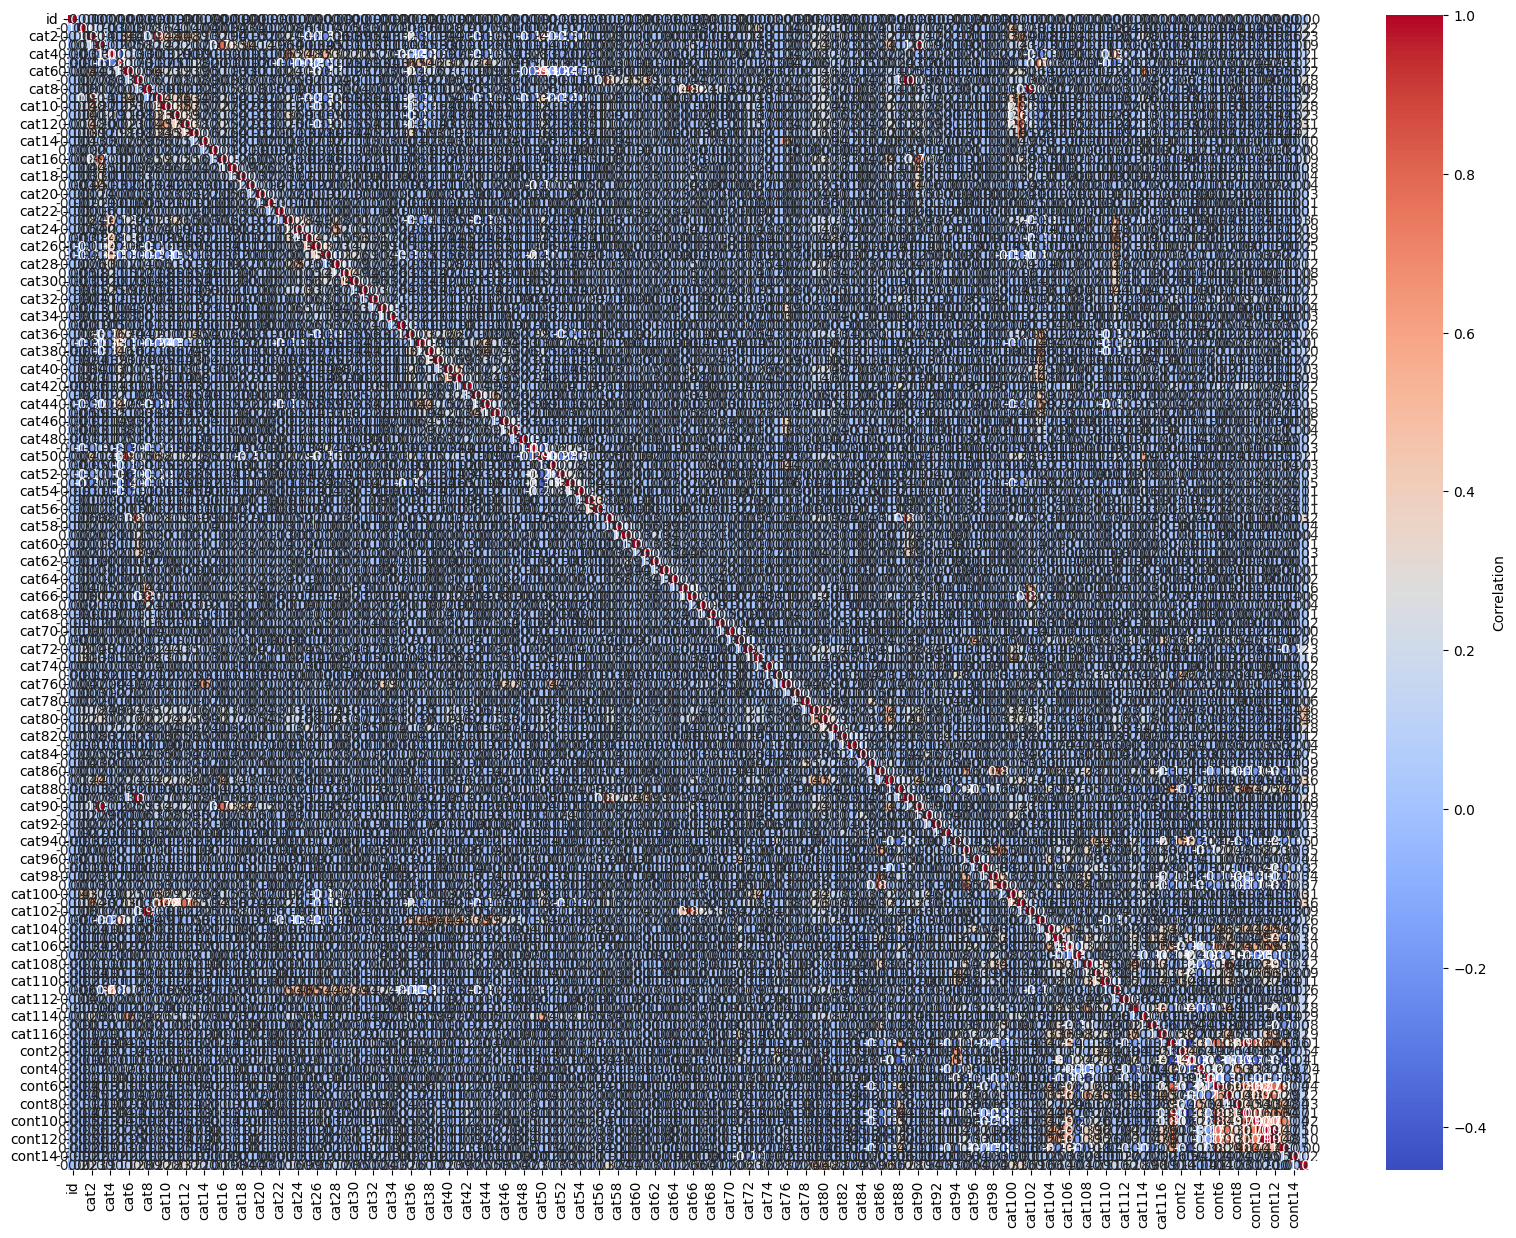

In [12]:
plt.figure(figsize=(20, 15))  # Width x Height in inches
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Correlation'})
plt.show()

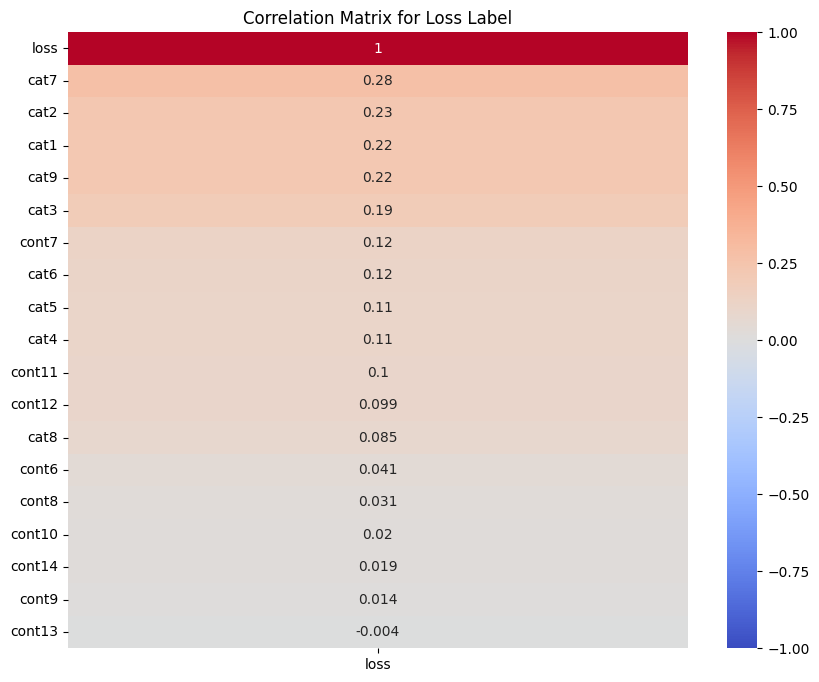

In [13]:
label_column = 'loss'

cont_feats =  ['cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14']

cat_feats= ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']

feats = cont_feats + cat_feats

#df_encoded = pd.get_dummies(df[cat_feats])
#df_numeric = df[cont_feats]
df_combined = pd.concat((df[cat_feats], df[cont_feats]), axis=1)

df_combined[label_column] = df[label_column]

correlation_matrix = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[[label_column]].sort_values(by=label_column, ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Loss Label')
plt.show()

In [ ]:
# TRAINED LINEAR REGRESSION MODEL BASED ON THE TARGET ENCODED DATA

In [22]:
features = ['cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']

X = df[features]
y = df['loss']

print(X)

             cat109       cat110       cat111       cat112       cat113  \
0       2639.853403  2555.547630  3112.781574  3409.877970  2745.118673   
1       3146.281369  3053.180857  2826.835029  2381.311463  2874.502783   
2       2609.825032  2938.455639  2826.835029  3249.903576  2942.939477   
3       3146.281369  3024.901680  3112.781574  3043.580935  2907.769445   
4       2058.911903  2427.051291  3112.781574  2837.771017  2874.502783   
...             ...          ...          ...          ...          ...   
188313  3146.281369  3047.405943  2826.835029  3249.895978  2874.502783   
188314  3146.281369  3180.011145  2826.835029  2381.311463  2601.824868   
188315  3146.281369  3076.768862  2826.835029  3347.448130  2942.939477   
188316  3146.281369  2786.703811  2826.835029  3409.877970  2923.442501   
188317  3146.281369  3047.405943  5167.734712  3409.877970  3065.474265   

             cat114       cat115       cat116  
0       3259.907946  2948.542000  2917.710468  
1  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [24]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [25]:
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , model.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -13616.105827116236

Weights:
w_ 1 =  0.4128165922689112  [ weight of  cat109 ]
w_ 2 =  0.2934223773862843  [ weight of  cat110 ]
w_ 3 =  0.9170956098793612  [ weight of  cat111 ]
w_ 4 =  0.8080673235397873  [ weight of  cat112 ]
w_ 5 =  0.5688995338963799  [ weight of  cat113 ]
w_ 6 =  0.9612427473241598  [ weight of  cat114 ]
w_ 7 =  0.83765695235362  [ weight of  cat115 ]
w_ 8 =  0.6851911572023519  [ weight of  cat116 ]


In [ ]:
Looking at the data, cat111, cat112, cat114, and cat115 has the highest weights from cat 109-116. 

In [29]:
# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   2702.81
 R^2 =   0.12


In [31]:
Our RMSE score is very high, meaning that the predicted values and real values have a significant difference. R^2 is also very low, suggesting that there
is no real value between the features and label.

In [ ]:
#TRAINING LINEAR REGRESSION MODEL ON HIGHEST WEIGHTED CATEGORY FROM BEFORE: CAT114

In [38]:

X = df['cat114'].to_frame()
y = df['loss']

print(X)

             cat114
0       3259.907946
1       3259.907946
2       3259.907946
3       3259.907946
4       3259.907946
...             ...
188313  3259.907946
188314  2088.702603
188315  3259.907946
188316  3259.907946
188317  3259.907946

[188318 rows x 1 columns]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [40]:
# Create the  LinearRegression model object 
model2 = LinearRegression()

# Fit the model to the training data 
model2.fit(X_train, y_train)

#  Make predictions on the test data 
prediction2 = model2.predict(X_test)

In [41]:
# Weight_1 (weight of feature LogGDP)
print('Model Summary\n\nWeight_1 =  ', model2.coef_[0])
# alpha
print('Alpha = ', model2.intercept_, '[ intercept ]')

Model Summary

Weight_1 =   1.0154671486187499 [ weight of feature LogGDP ]
Alpha =  -45.11987339779034 [ intercept ]


In [42]:
#The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction2)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction2))


Model Performance

RMSE =   2829.83
 R^2 =   0.03


In [ ]:
R^2 decreased even more when trained with only cat114 as the feature.

In [43]:
# TRAINING MODEL USING ONLY THE COLUMNS THAT HAVE A OR B

In [59]:
cols_with_A_or_B = df.columns[df.apply(lambda col: col.isin(['A', 'B']).all())]

# Create a new DataFrame with only the extracted columns
df_AB = df[cols_with_A_or_B]
df_AB = df_AB.replace({'A': 1, 'B': 0})

print(df_AB)

C:\Users\shimr\AppData\Local\Temp\ipykernel_5864\1011918628.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_AB = df_AB.replace({'A': 1, 'B': 0})


        cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...  \
0          1     0     1     0     1     1     1     1     0      1  ...   
1          1     0     1     1     1     1     1     1     0      0  ...   
2          1     0     1     1     0     1     1     1     0      0  ...   
3          0     0     1     0     1     1     1     1     0      1  ...   
4          1     0     1     0     1     1     1     1     0      0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
188313     1     0     1     1     1     1     1     1     0      1  ...   
188314     1     1     1     1     1     0     1     1     1      1  ...   
188315     1     0     1     1     1     1     1     0     0      1  ...   
188316     1     0     1     1     1     1     1     1     0      0  ...   
188317     0     1     1     0     1     1     1     1     1      1  ...   

        cat63  cat64  cat65  cat66  cat67  cat68  cat69  cat70  cat71  cat72  
0       

In [60]:
df_AB['loss'] = df['loss']

In [61]:
#df_ABfeatures = df_AB.columns
X = df_AB.columns
y = df['loss']

print(X)

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
       'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
       'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
       'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
       'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
       'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
       'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'loss'],
      dtype='object')


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [73, 188318]